In [4]:
import cv2
import numpy as np

In [5]:
#直接用生成矩阵的方式生成图片
img0 = np.array([[0,0,1],[0,1,0],[1,0,0]])

#查看矩阵数值以及大小
print(img0)


print(img0.shape)
print("img0 size = %s,%s"%(img0.shape[0],img0.shape[1]))


[[0 0 1]
 [0 1 0]
 [1 0 0]]
(3, 3)
img0 size = 3,3


In [3]:
!pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [6]:
import matplotlib.pyplot as plt
plt.imshow(img0,cmap='gray') #显示图像，camp是函数颜色映射

In [4]:
#读取打开摄像头
cap = cv2.VideoCapture(0)
#读取一个本地视频
#cap = cv2.VideoCapture("../How Computer Vision Works.mp4")

In [ ]:
return_value= True
while return_value:
    return_value,frame = cap.read()
    print(cap.isOpened())
    plt.imshow(frame,cmap = 'gray')

plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))


In [ ]:
print(frame.shape)

In [ ]:
cap.release()

In [5]:
import cv2
import matplotlib.pyplot as plt 
img = cv2.imread('lena.jpg')
print(img.shape)
#cv2.imshow(img)
plt.imshow(img)

(722, 726, 3)


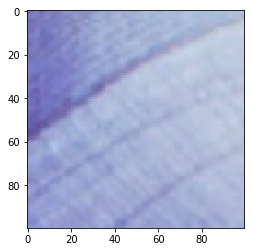

In [6]:
#选择图像中特定像素点范围的区域
img_roi = img[100:200,300:400]
plt.imshow(img_roi)

(722, 726, 3)


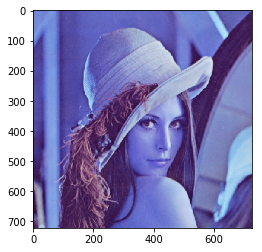

In [7]:
#使用cv2.imread()接口读图像，读进来的是BGR格式以及【0～255】。所以要将img转换为RGB格式显示
#cv2.cvtClolor(a,b)    a是BGR图像，b是要转换的目标格式图像
import cv2
img_BGR= cv2.imread('lena.jpg')
plt.imshow(img_BGR)
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
print(img_RGB.shape)
#plt.imshow(img_RGB)
#img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
#print(img_HSV.shape)
#plt.imshow(img_HSV)
#plt.imshow(cv2.threshold(img,128,200,cv2.THRESH_BINARY))

(300, 600, 3)

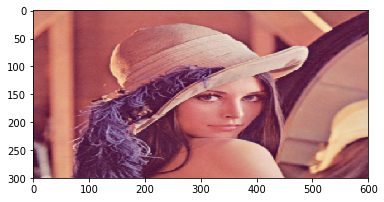

In [8]:

# 图像的放大与缩小

# 列，行
img =  cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img =cv2.resize(img,(600,300))
plt.imshow(img)
img.shape


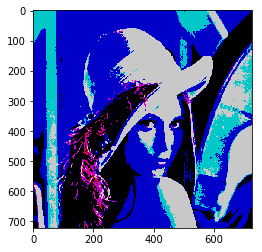

In [9]:
#二值化
img = cv2.imread('lena.jpg')
ret, thresh = cv2.threshold(img,128,200,cv2.THRESH_BINARY)
plt.imshow(thresh)

[121 137 213]


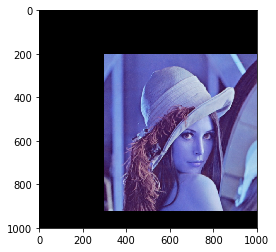

In [10]:
#图像的移动
M = np.float32([[1,0,300],[0,1,200]]) #定义一个变换矩阵M（平移的变换矩阵）
image_1 = cv2.warpAffine(img,M,(1000 ,1000))#将img按照变换矩阵M进行移动（）

plt.imshow(image_1)
print(image_1[200,300])

(900, 800, 3)


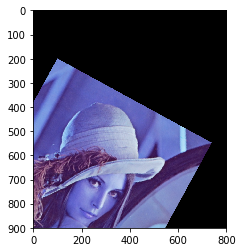

In [11]:
#旋转角度
theta=0.5
#旋转的变换矩阵M
M = np.float32([[np.cos(theta),-np.sin(theta),100],[np.sin(theta),np.cos(theta),200]])
#定义旋转轴的坐标
cols = 800
rows = 900
#根据旋转的变换矩阵，以（800，900）为轴，对image进行旋转
image_2 = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(image_2)
print(image_2.shape)

In [12]:
# 初始位置的三个顶点坐标
pts1 = np.float32([[50,50],[200,50],[50,200]])
# 变换后的三个顶点坐标
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2) # 自动生成M
print(M)

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


[[ 3.01223786e-01  2.61933727e-02 -1.85711013e+01]
 [ 1.33801017e-02  3.21122440e-01 -2.16222443e+01]
 [ 6.76353865e-05 -1.70147592e-03  1.00000000e+00]]


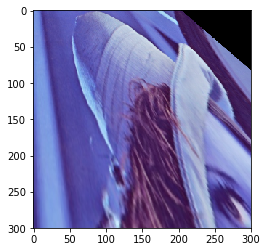

In [13]:
#拉伸
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[100,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
# 拉伸变换后者透视变换
dst = cv2.warpPerspective(img,M,(300,300))
plt.imshow(dst)

In [ ]:
img =  cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img =cv2.resize(img,(500,300))
plt.imshow(img)
img.shape

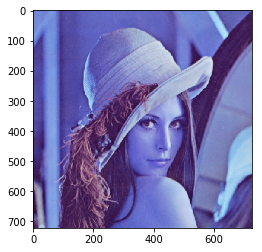

In [14]:
plt.imshow(img)

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
(722, 726, 3)
[0 0 0]


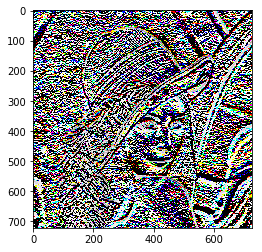

In [21]:
# # 图像滤波/卷积

# In[139]:


kernel = np.ones((3,3),np.float32)/8
kernel=-kernel
kernel[0,:]=[-1,-1,-1]
kernel[1,:]=[0,0,0]
kernel[2,:]=[1,1,1]


print(kernel)
plt.imshow(img)


# In[140]:


#dst=cv.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])；当ddepth=-1时，表示输出图像与原图像有相同的深度。
print(img.shape)
result = cv2.filter2D(img,-1,kernel)
result.shape
print(result[0,0])
plt.imshow(result*255)

In [ ]:
#边缘线检测
cv2.imwrite("canny.jpg", cv2.Canny(img_gb, 200, 300))
cv2.imshow("canny", cv2.imread("canny.jpg"))

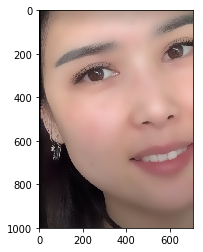

In [48]:
# 图像模糊与锐化
image_homework = cv2.imread('image_homework.jpeg')
image_homework = cv2.cvtColor(image_homework,cv2.COLOR_BGR2RGB)
#img_gb= cv2.GaussianBlur(image_homework, (15, 15), 1000000,10000)  # 高斯模糊
#plt.imshow(img_gb)
img_bf = cv2.bilateralFilter(image_homework, 47, 75, 75)
plt.imshow(image_homework)
plt.imshow(img_bf)
#print(image_homework)
#print(img_bf)
#print(img_bf.shape)

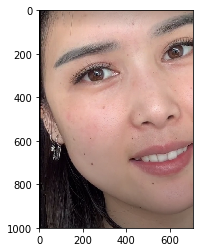

In [49]:
plt.imshow(image_homework)

[[0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757]
 [0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757]
 [0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757]
 [0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
  0.00226757 0.00226757 0.00226757]
 [0.00226757 0.00226757 0.00226757 0.002

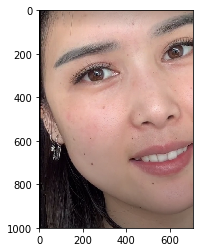

In [61]:

# # 图像滤波/卷积

kernel = np.ones((21,21),np.float32)/441
#kernel=-kernel
#kernel[1,1]=1
print(kernel)
plt.imshow(image_homework)
print(image_homework.shape)

(1000, 707, 3)
[16 13 15]


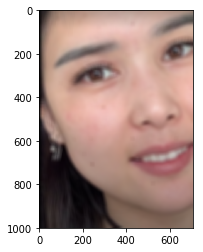

In [62]:
#dst=cv.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])；当ddepth=-1时，表示输出图像与原图像有相同的深度。

result = cv2.filter2D(image_homework,-1,kernel)
print(result.shape)
print(result[0,0])
plt.imshow(result)



In [63]:
kernel = np.ones((21,21),np.float32)/441
#kernel=-kernel
#kernel[1,1]=1
kernel = array[
    [0,0,0,0]
    [0,-1,0,0]
    [1,1,1,1]
    [0,0,0,0]
              ]
print(kernel)
plt.imshow(image_homework)
print(image_homework.shape)
result = cv2.filter2D(image_homework,-1,kernel)
print(result.shape)
print(result[0,0])
plt.imshow(result)



NameError: name 'array' is not defined

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

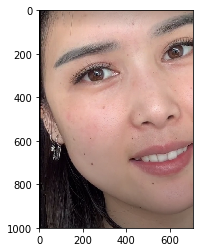

In [64]:
cat_img = cv2.imread('image_homework.jpeg')
cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
plt.imshow(cat_img)

In [75]:
kernel_size = 15
sigma = 75
def gassian_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float)
    centre = kernel_size // 2
    for i in range(kernel_size):
        for j in range(kernel_size):
            d = (i - centre)**2 + (j - centre)**2
            kernel[i, j] = np.exp(-d/(2*sigma**2))
    #kernel /= (2 * np.pi * sigma**2)
    kernel /= kernel.sum() # 归一化
    return kernel

kernel = gassian_kernel(kernel_size, sigma)
kernel

array([[0.00442053, 0.00442564, 0.00442997, 0.00443352, 0.00443628,
        0.00443825, 0.00443943, 0.00443983, 0.00443943, 0.00443825,
        0.00443628, 0.00443352, 0.00442997, 0.00442564, 0.00442053],
       [0.00442564, 0.00443076, 0.00443509, 0.00443864, 0.00444141,
        0.00444338, 0.00444457, 0.00444496, 0.00444457, 0.00444338,
        0.00444141, 0.00443864, 0.00443509, 0.00443076, 0.00442564],
       [0.00442997, 0.00443509, 0.00443943, 0.00444299, 0.00444575,
        0.00444773, 0.00444891, 0.00444931, 0.00444891, 0.00444773,
        0.00444575, 0.00444299, 0.00443943, 0.00443509, 0.00442997],
       [0.00443352, 0.00443864, 0.00444299, 0.00444654, 0.00444931,
        0.00445129, 0.00445247, 0.00445287, 0.00445247, 0.00445129,
        0.00444931, 0.00444654, 0.00444299, 0.00443864, 0.00443352],
       [0.00443628, 0.00444141, 0.00444575, 0.00444931, 0.00445208,
        0.00445406, 0.00445525, 0.00445564, 0.00445525, 0.00445406,
        0.00445208, 0.00444931, 0.00444575, 

(1000, 707, 3)
707 1000
15
7
range(7, 700)
(1000, 707, 3)


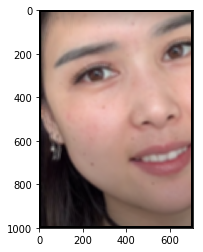

In [76]:
def convolution(img, kernel):
    img_h, img_w = img.shape[:2]
    print(img.shape)
    print(img_w,img_h)
    print(kernel.shape[0])
    bored = int(kernel.shape[0] / 2)
    print(bored)
    new_img = np.zeros((img_h, img_w, 3), dtype=np.float)
    print(range(bored, img_w - bored))
    for c in range(3):
        for x in range(bored, img_w - bored):
            for y in range(bored, img_h - bored):
                new_img[y, x, c] = np.sum(kernel * img[y-bored:y+bored+1, x-bored:x+bored+1, c])
    new_img = np.clip(new_img, 0, 255)
    new_img = new_img.astype(np.uint8)
    return new_img
img = convolution(cat_img, kernel) 
print(img.shape)
plt.imshow(img)